In [1]:
# Análise exploratória de dados para estratégia de marketing

**Name:** Ana Gnoatto

**Last Update:** 24/11/2023

**Status:** *In progress ⏳*


## Contexto do problema

contexto

## 0. Importando bibliotecas 📚

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as pc

import datetime
import time
from datetime import date
from datetime import datetime, date, time

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Importando os dados

In [3]:
# abrindo o arquivo

data_source = pd.read_csv('Sample - Superstore.csv', encoding = 'ISO-8859-1')

In [4]:
# criando uma copia para edição
data=data_source.copy()

## 2. Explorando os dados (Sanity Check)

In [5]:
# qual é o tamanho da tabela fonte em linhas e colunas?
data.shape

(9994, 21)

In [6]:
# quais colunas são essas?
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
# conferindo formato das colunas
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
# sanity check - checar se há valores nulos na coluna de Order ID
data[data['Order ID'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [9]:
# sanity check - checar se há valores nulos na tabela
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
# sanity check - checar se há valores fazem sentido no ponto de vista do negócio
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Irregularidades encontradas:

a. Valor mínimo de lucro(Profit) negativo e alto

b. Valor mínimo de venda(Sales) baixo em 0.44

c. Alto Gap entre valor maximo de Sales e 75%. Média também não condiz com o percentil 50%. Analisar o percentil 90% que pode 
estar puxando a média para cima e descobrir quais vendas ou produtos são esses.

d. Desconto (Discount) máximo relativamente alto em 80%, quais são esses casos? 

In [11]:
# a. Valor mínimo de lucro(Profit) negativo e alto
data[data['Profit']==data['Profit'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978


In [12]:
# b. Valor mínimo de venda(Sales) baixo em 0.44
data[data['Sales']==data['Sales'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4101,4102,US-2017-102288,6/19/2017,6/23/2017,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.11


In [13]:
# c. Alto Gap entre valor maximo de Sales e 75%. Média também não condiz com o percentil 50%. Analisar o percentil 90%.

data['Sales'].quantile(0.97)

# Foi constatado que 97% é o grupo que mais se aproxima do valor máximo.

1325.7788999999998

In [14]:
data[data['Sales']>=data['Sales'].quantile(0.97)].sort_values('Sales', ascending=False).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [15]:
# d. Desconto (Discount) máximo relativamente alto em 80%, quais são esses casos?
data[data['Discount']>=data['Discount'].quantile(0.70)].sort_values('Discount', ascending=False).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8220,8221,CA-2014-120775,10/3/2014,10/7/2014,Standard Class,RD-19930,Russell D'Ascenzo,Consumer,United States,Dallas,...,75217,Central,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.788,3,0.8,-3.0396
8965,8966,CA-2017-106691,11/6/2017,11/12/2017,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Houston,...,77070,Central,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,1.248,2,0.8,-1.9344
1103,1104,US-2017-145863,4/21/2017,4/27/2017,Standard Class,RP-19390,Resi Pölking,Consumer,United States,Houston,...,77041,Central,OFF-BI-10002049,Office Supplies,Binders,UniKeep View Case Binders,2.934,3,0.8,-4.9878
4568,4569,CA-2015-111990,11/8/2015,11/13/2015,Standard Class,DB-13660,Duane Benoit,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,10.476,6,0.8,-17.2854
8980,8981,CA-2014-108182,2/6/2014,2/10/2014,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Romeoville,...,60441,Central,OFF-BI-10001196,Office Supplies,Binders,"Avery Flip-Chart Easel Binder, Black",8.952,2,0.8,-14.7708


## 3. Limpeza dos dados 🧹

In [16]:
# Retirando coluna de Row ID
data.drop('Row ID', axis=1, inplace=True)

In [17]:
# Convertendo formato do Order Date para data e adicionando coluna de mes do pedido
data['order_month'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [18]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


## 4. Respondendo os problemas de negócio

Quais variáveis temos para explorar?

In [19]:
variaveis=data.shape[1]-1

print('Temos '+str(variaveis)+' variáveis para análise')

Temos 20 variáveis para análise


Quantos pedidos tivemos no total? 

In [20]:
pedidos_unicos=data['Order ID'].unique().shape[0]

print('Temos '+str(pedidos_unicos)+' pedidos únicos')

Temos 5009 pedidos únicos


Qual tipo de entrega sai mais?

In [21]:
# verificar se o ship mode é o mesmo para cada order id

ordens_unicas = len(data['Order ID'].unique())
linhas_unicas = len(data[['Order ID','Ship Mode']].drop_duplicates())

ordens_unicas==linhas_unicas

True

In [22]:
data[['Order ID','Ship Mode']].drop_duplicates().groupby('Ship Mode').count()

,Order ID
Ship Mode,
First Class,787
Same Day,264
Second Class,964
Standard Class,2994


**Qual é a situação atual da empresa? (Venda e Lucro)**

In [23]:
# Convertendo formato do Order Date para data e adicionando coluna de ano do pedido
data['order_year'] = pd.to_datetime(data['Order Date']).dt.to_period('y')

In [24]:
# Evolução de faturamento por mes
data.groupby('order_month')['Sales'].sum()

order_month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160

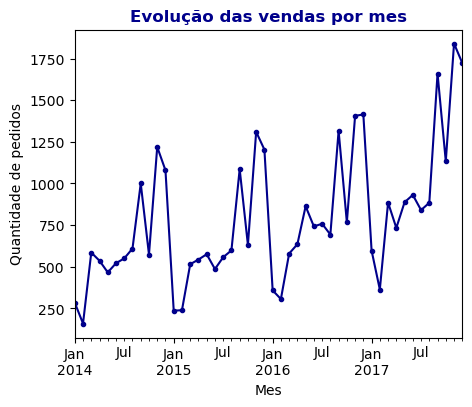

In [25]:
# Evolução de vendas por mes
data.groupby('order_month')['Quantity'].sum().plot(color="darkblue",figsize=(5,4), marker=".")
plt.title("Evolução das vendas por mes", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.xlabel("Mes")
plt.ylabel("Quantidade de pedidos")
plt.show()

Vemos que há um efeito de sazonalidade entre os meses de Setembro, Novembro e Dezembro. Provavelmente ligado a datas comemorativas e mudança no comportamento de compras (Black Friday/Natal)

Por esse motivo pode ser mais vantajoso olhar para a visão anual.

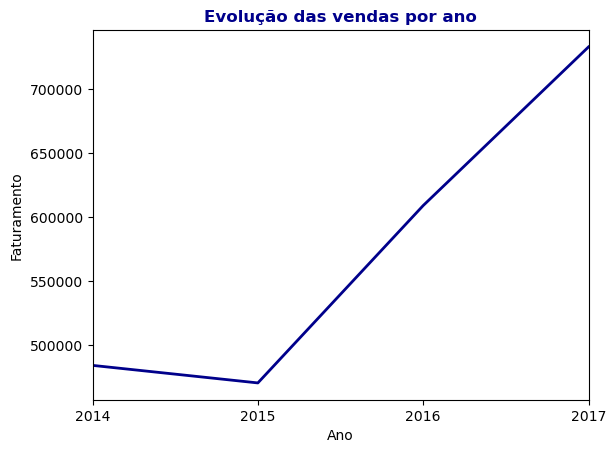

In [26]:
# Evolução de vendas por ano
data.groupby("order_year")['Sales'].sum().plot(color="darkblue", lw=2)
plt.title("Evolução das vendas por ano", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.xlabel("Ano")
plt.ylabel("Faturamento")
plt.show()

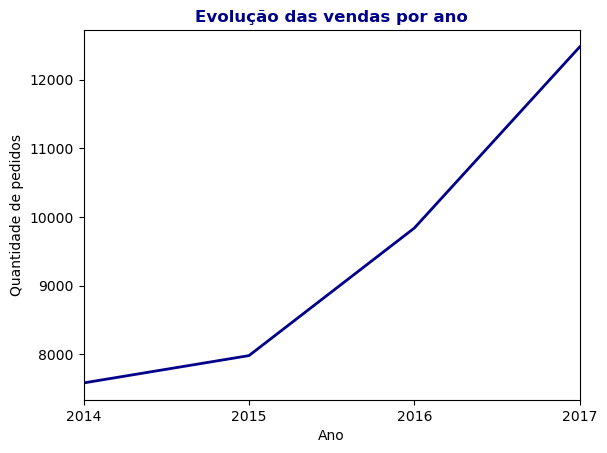

In [27]:
data.groupby("order_year")['Quantity'].sum().plot(color="darkblue", lw=2)
plt.title("Evolução das vendas por ano", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.xlabel("Ano")
plt.ylabel("Quantidade de pedidos")
plt.show()

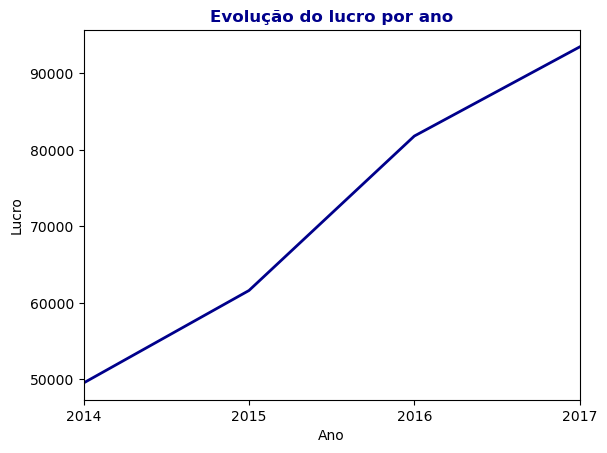

In [28]:
data.groupby("order_year")['Profit'].sum().plot(color="darkblue", lw=2)
plt.title("Evolução do lucro por ano", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.xlabel("Ano")
plt.ylabel("Lucro")
plt.show()

**Segmentos mais pedidos**

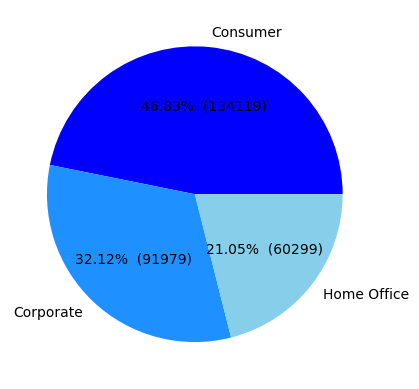

In [29]:
color=["blue","dodgerblue","skyblue"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(data.groupby('Segment')['Profit'].sum(), colors=color, 
        labels=data.groupby('Segment')['Profit'].sum().index,
       autopct=make_autopct(data.groupby('Segment')['Profit'].sum())
       )

plt.show()

In [30]:
# calculando o lucro por quantidade
data.groupby('Segment')['Profit'].sum()/data.groupby('Segment')['Quantity'].sum()

Segment
Consumer       6.870509
Corporate      7.923771
Home Office    8.941085
dtype: float64

O segmento Consumer gera maior lucro devido a quantidade de vendas ser maior também. Se considerarmos o lucro por venda, o segmento de Home Office ganha. 
Portanto, investir no segmento de Home Office pode aumentar o lucro da empresa.

**Regiões com mais receita e lucro**

In [31]:
data.groupby("Region")[['Quantity','Sales','Profit']].sum()

,Quantity,Sales,Profit
Region,,,
Central,8780,501239.8908,39706.3625
East,10618,678781.2400,91522.7800
South,6209,391721.9050,46749.4303
West,12266,725457.8245,108418.4489


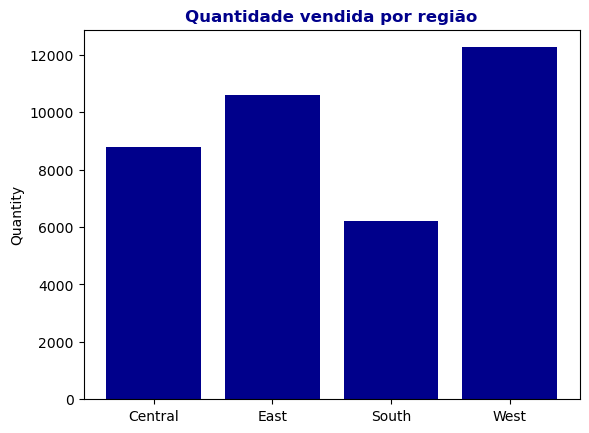

In [32]:
# criando visão de Vendas em gráfico de barra
categorias=data.groupby("Region")[['Quantity','Sales','Profit']].sum()
plt.bar(categorias['Quantity'].index, categorias['Quantity'].values, width=0.8, color="darkblue")
plt.ylabel("Quantity")
plt.title("Quantidade vendida por região", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.show()

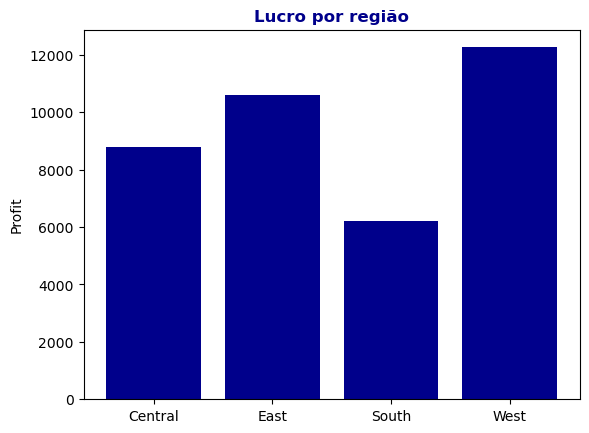

In [33]:
# criando visão do Lucro em gráfico de barra
categorias=data.groupby("Region")[['Quantity','Sales','Profit']].sum()
plt.bar(categorias['Quantity'].index, categorias['Quantity'].values, width=0.8, color="darkblue")
plt.ylabel("Profit")
plt.title("Lucro por região", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.show()

<Axes: xlabel='order_year'>

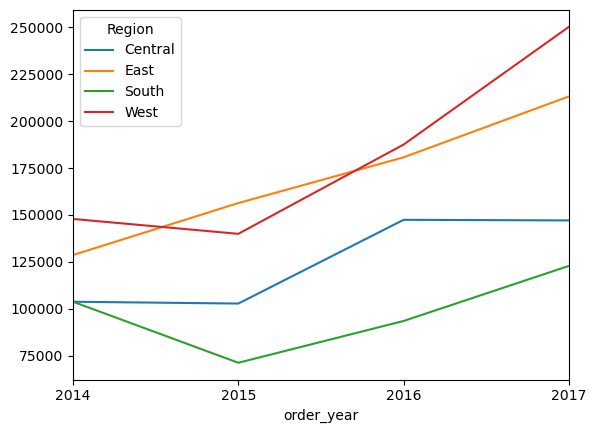

In [34]:
# verificando se a tendencia se mantem ao longo do tempo - Faturamento
data.groupby(["order_year","Region"])['Sales'].sum().unstack().plot()

<Axes: xlabel='order_year'>

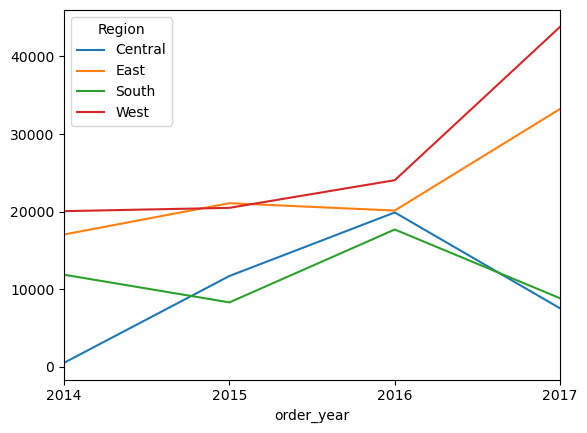

In [35]:
# verificando se a tendencia se mantem ao longo do tempo - Lucro
data.groupby(["order_year","Region"])['Profit'].sum().unstack().plot()

## Categorias mais lucrativas

As regiões mais lucrativas são East e West. Tendencia se mantem ao longo dos anos.

In [36]:
# convertendo order_year em valor numerico e filtrando os anos de 2016 e 2017
data["Order Year N"]=data["order_year"].astype('int64')

data_recente=data[data["Order Year N"]>=46]

In [37]:
data_recente.groupby("Category")["Profit"].sum().sort_values(ascending=False)

Category
Technology         90458.2486
Office Supplies    74797.8509
Furniture           9978.3444
Name: Profit, dtype: float64

In [38]:
# calculando o lucro por unidade vendida por categoria (total lucro/total unidade vendida)
total_lucro=data_recente.groupby("Category")["Profit"].sum()
total_vendas=data_recente.groupby("Category")["Quantity"].sum()
(total_lucro/total_vendas).sort_values(ascending=False)

Category
Technology         22.27487
Office Supplies     5.49096
Furniture           2.15515
dtype: float64

Categoria de Tecnologia é a mais lucrativa, podendo ser uma boa oportunidade para investir.

**Dentro da categoria de Technology, qual são as subcategorias mais relevantes?**

In [39]:
# agrupando os dados por sub categoria
data_tech=data_recente[data_recente["Category"]=="Technology"].groupby("Sub-Category")[["Sales","Quantity","Profit"]].sum()

In [40]:
# criando uma nova coluna de lucro por unidade
data_tech["Profit Per Quantity"]=data_tech["Profit"]/data_tech["Quantity"]
data_tech

,Sales,Quantity,Profit,Profit Per Quantity
Sub-Category,,,,
Accessories,101842.086,1761,25336.6455,14.387647
Copiers,112498.798,142,42774.5828,301.229456
Machines,99451.561,250,38.1024,0.152410
Phones,184302.546,1908,22308.9179,11.692305


Os sub-segmentos mais lucrativos são Copiadoras e Acessórios. Como segunda análise poderia verificar o potencial de escala de cada sub-segmento.

**Qual estado possui mais vendas e lucro?**

In [41]:
# Descobrindo os estados mais lucrativos - Top 10
top10_profit=data_recente.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)
top10_profit

State
Kentucky       5968.3840
Delaware       7029.9107
New Jersey     7213.0952
Virginia       9657.4876
Georgia        9994.4165
Indiana       15524.6596
Michigan      17480.2806
Washington    21466.6555
New York      41012.0212
California    49372.1750
Name: Profit, dtype: float64

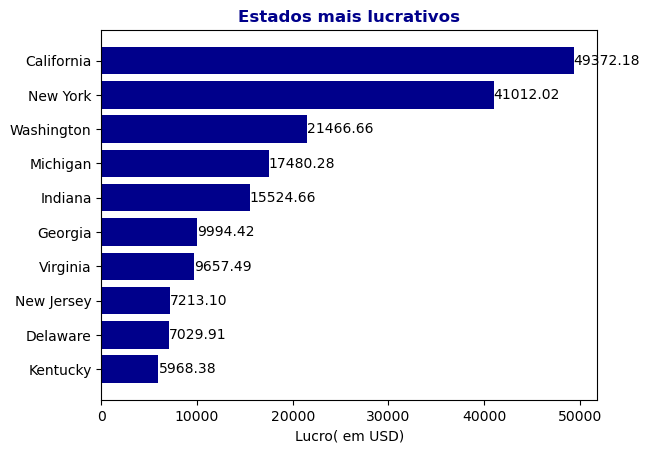

In [42]:
barhs = plt.barh(top10_profit.index, top10_profit.values, color="darkblue")
plt.xlabel("Lucro( em USD)")
plt.title("Estados mais lucrativos", {'fontsize': 12,
 'fontweight': 'semibold',
 'color': "darkblue"})
plt.bar_label(barhs, fmt='%.2f')
plt.show()

**Estados com lucro negativo**

In [43]:
data_recente.groupby("State")["Profit"].sum().sort_values(ascending=False).tail(10)

State
Florida            -227.7465
Oregon             -942.9719
Arizona           -2761.1100
Tennessee         -3467.5906
North Carolina    -4827.6923
Colorado          -5824.9809
Pennsylvania      -9297.7975
Ohio              -9339.4223
Illinois          -9554.6539
Texas            -14078.1598
Name: Profit, dtype: float64

In [44]:
# Descobrindo os estados com mais faturamento - Top 10
data_recente.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

State
California      277940.2560
New York        165767.0970
Washington       85354.1800
Texas            85107.9102
Pennsylvania     75754.9500
Michigan         53253.6840
Ohio             48012.8600
Illinois         45385.3300
Indiana          43978.2300
Florida          40047.9990
Name: Sales, dtype: float64

In [45]:
# investigando mais a fundo o motivo dos estados Texas, Pennsylvania, Ohio, Illinois, Florida estarem como mais vendidos mas com lucro negativo
data_recente.groupby("State")[["Sales","Quantity","Discount","Profit"]].mean().sort_values("Discount", ascending=False).head(10)

,Sales,Quantity,Discount,Profit
State,,,,
Illinois,154.898737,3.648464,0.387372,-32.609740
Texas,150.633469,3.819469,0.364673,-24.917097
Pennsylvania,226.134179,3.662687,0.334328,-27.754619
Colorado,185.544726,3.646018,0.326549,-51.548504
Arizona,153.765982,3.663717,0.324779,-24.434602
Oregon,128.268154,3.753846,0.321538,-14.507260
Ohio,163.866416,3.754266,0.318089,-31.875161
Florida,188.905656,3.570755,0.297406,-1.074276
Tennessee,160.369308,3.641667,0.291667,-28.896588


Apesar de estarem entre os estados que mais vendem, os estados de Texas, Pennsylvania, Ohio, Illinois, Florida são os que mais oferecem desconto, não podemos dizer se há maior demanda nos estados ou se é por conta dos descontos.

Em resumo, os estados de California, New York e Washington são os mais lucrativos.

In [46]:
# análise de correlação
correlation = data[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
correlation

,Sales,Profit,Quantity,Discount
Sales,1.000000,0.479064,0.200795,-0.028190
Profit,0.479064,1.000000,0.066253,-0.219487
Quantity,0.200795,0.066253,1.000000,0.008623
Discount,-0.028190,-0.219487,0.008623,1.000000


<Axes: >

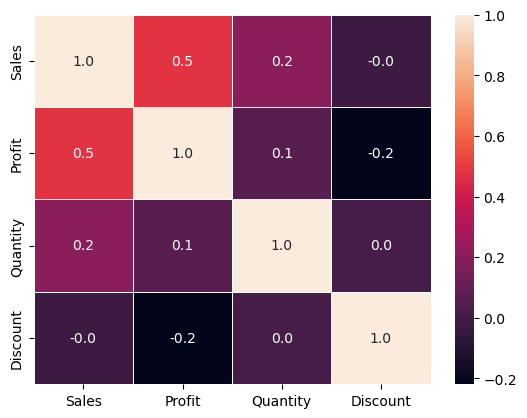

In [47]:
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Foi identificado uma baixa correlação negativa entre lucro e desconto e outra positiva entre quantidade de vendas e desconto, não infere causalidade, porém é valido o testar a hipótese de que temos mais vendas por conta da demanda ou se é pelos descontos oferecidos.

**Quais são os clientes mais lucrativos?**

In [48]:
# contando quantos clientes possuem na base
len(data["Customer ID"].unique())

793

In [49]:
data.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(10)

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

### Analise de pareto

O objetivo da análise é identificar o 20% dos clientes que geram 80% do lucro

In [50]:
lucro_clientes=data.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

# obtendo top 25% dos clientes
lucro_clientes.quantile(0.75)
top25_clientes=lucro_clientes[lucro_clientes>lucro_clientes.quantile(0.75)]

# Esse grupo é responsável por quantos % do lucro total?
top25_clientes.sum()/data['Profit'].sum()

0.9002756343956773

90% do lucro está concentrado em 25% dos clientes. Um cenário preocupante já que a lucratividade depende destes clientes.
Importante ter um tratamento especial com esses clientes ou encontrar novos.